8. [**Sınıflandırma Problemleri**](#8.-Sınıflandırma-Problemleri)
    * [a. Lojistik Regresyon](#a.-Lojistik-Regresyon)
        * [LojR - Model Oluşturma](#LojR---Model-Oluşturma)
        * [LojR - Model Tuning](#LojR---Model-Tuning)
    * [b. Naïve Bayes](#b.-Naïve-Bayes)
        * [NB - Model Oluşturma](#NB---Model-Oluşturma)
    * [c. K-En Yakın Komşu (KNN)](#c.-K-En-Yakın-Komşu-(KNN))
        * [KNN - Model Oluşturma](#KNN---Model-Oluşturma(C))
        * [KNN - Model Tuning](#KNN---Model-Tuning(C))
    * [d. Support Vector Classifier (SVC)](#d.-Support-Vector-Classifier-(SVC))
        * [i. Linear SVC - Model Oluşturma](#i.-Linear-SVC---Model-Oluşturma)
            * [Linear SVC - Model Oluşturma Tuning](#Linear-SVC---Model-Oluşturma-Tuning)
        * [ii. (RBF) Radial Basis Function SVC - Model Oluşturma](#ii.-(RBF)-Radial-Basis-Function-SVC---Model-Oluşturma)
            * [RBF SVC - Model Tuning](#RBF-SVC---Model-Tuning)
    * [e. Yapay Sinir Ağları (ANN)](#e.-Yapay-Sinir-Ağları-(ANN))
        * [ANN - Model Oluşturma](#ANN---Model-Oluşturma(C))
        * [ANN - Model Tuning](#ANN---Model-Tuning(C))
    * [f. Classification And Regression Trees (CART)](#f.-Classification-And-Regression-Trees-(CART))
        * [CART - Model Oluşturma](#CART---Model-Oluşturma(C))
        * [CART - Model Tuning](#CART---Model-Tuning(C))
    * [g. Random Forest](#g.-Random-Forest)
        * [RF - Model Oluşturma](#RF---Model-Oluşturma(C))
        * [RF - Model Tuning](#RF---Model-Tuning(C))
    * [h. Gradient Boosting Machines (GBM)](#h.-Gradient-Boosting-Machines-(GBM))
        * [GBM - Model Oluşturma](#GBM---Model-Oluşturma(C))
        * [GBM - Model Tuning](#GBM---Model-Tuning(C))
    * [i. eXtreme Gradient Boosting (XGBoost)](#i.-eXtreme-Gradient-Boosting-(XGBoost))
        * [XGBoost - Model Oluşturma](#XGBoost---Model-Oluşturma(C))
        * [XGBoost - Model Tuning](#XGBoost---Model-Tuning(C))
    * [j. LightGBM](#j-LightGBM)
        * [LightGBM - Model Oluşturma](#LightGBM---Model-Oluşturma(C))
        * [LightGBM - Model Tuning](#LightGBM---Model-Tuning(C))
    * [k Category Boosting (CatBoost)](#k-Category-Boosting-(CatBoost))
        * [CatBoost - Model Oluşturma](#CatBoost---Model-Oluşturma(C))
        * [CatBoost - Model Tuning](#CatBoost---Model-Tuning(C))

# **8. Sınıflandırma Problemleri**

Bu başlık altında;
* Lojistik Regresyon
* Naive Bayes
* K-En Yakın Komşu (KNN)
* Destek Vektör Sınıflandırıcısı (SVC)
* Çok Katmanlı Algılayıcılar (ANN)
* Classification and Regression Trees (CART)
* Bagging (Bootstrap Aggregation)
* Random Forests (RF)
* Gradient Boosting Machines (GBM)
* Extreme Gradient Boosting (XGBoost)
* LightGBM
* CatBoost
modellerini inceleyeceğiz.<br><br>Ayrıca her bir model için
* Model kurmayı
* Kurduğumuz model ile tahmin yapmayı
* Kurduğumuz modelin optimizasyonunu gerçekleştireceğiz.

## **a. Lojistik Regresyon**

Amaç sınıflandırma problemı için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. 
* 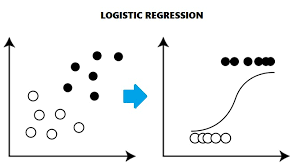
* Formulasyonundan bahsetmek gerekirse;
    * Lojistik Dağılım Fonksiyonunda X bağımsız değişkenlerinin x değeri aldığında Y değişkeninin 1 olma olasılığı aşağıdaki formulasyon yardımıyla hesaplanır.
    * Daha sonra $\pi$ ile temsil edilen dagilim fonksiyonunun Odds orani uygulanir.
    * Daha sonra bu degerin logaritmasi alarak modelimiz dogrusal bir modele donusuturulur.
    * Dogrusala donusturme islemimizin amaci, dogrusallik sayesinde yorumlanabilmeyi arttikmaktir.
    * <div> 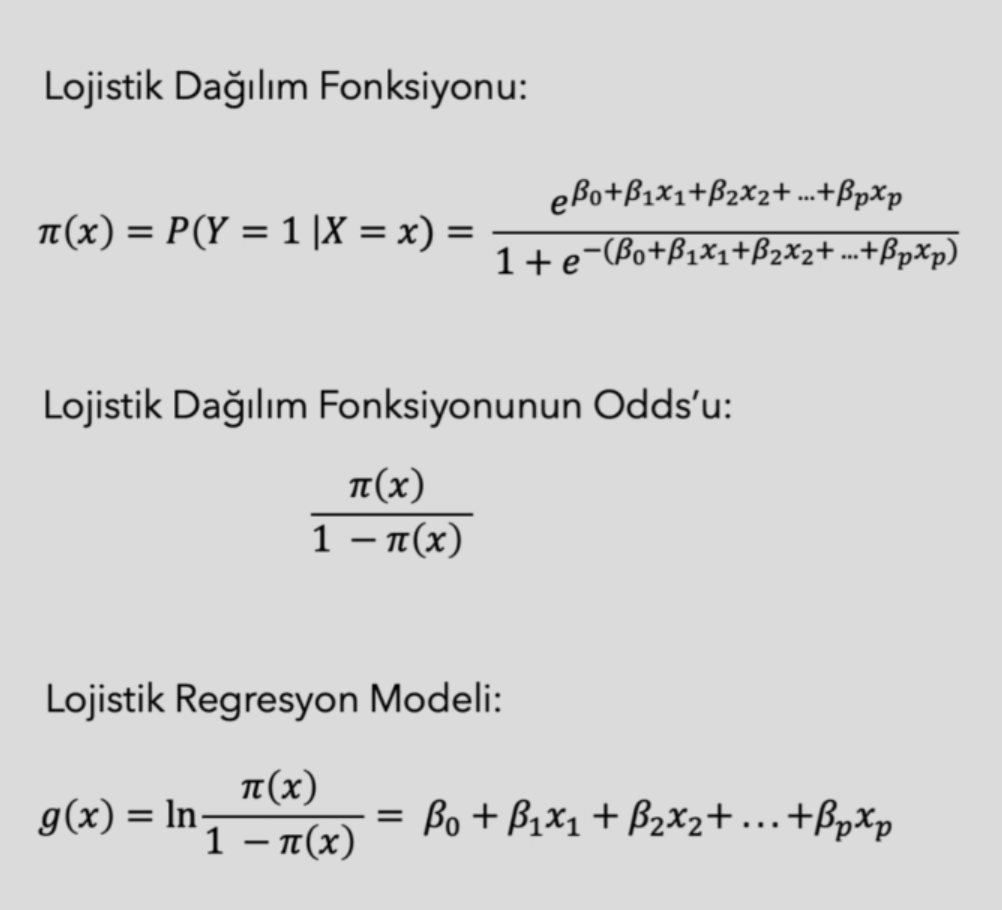</div>
* Bagimli degisken kategoriktir.
* Adini bagimli degiskene uygulanan logit donusumunden alir.
* Dogrusal Regresyonda aranan varsayimlar burada aranmadigi icin daha esnek kullaniolabilirligi vardir.
* Bagimli degiskenin 1 olarak tanimlanan degerinin gerceklesme olasiligi hesaplanir. Dolayisiyla bagimli degiskenin alacagi deger ile ilgilenilmez.
* Logistic fonksiyonun sayesinde uretilen degerler 0-1 arasinda olur.

### LojR - Model Oluşturma

Verisetimizin hikayesi, gelen hastalarimizin belirli degisken degerlerine gore seker hastasi olup olmadigini belirten bir hikayesi bulunmaktadir. *Outcome* degiskeninde 1 degeri hasta olanlari, 0 degeri hasta olmayanlari belirtmektedir.

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("csv/diabetes.csv")
df.dropna(inplace = True)
y = np.ravel(df[["Outcome"]])
X = df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 25)

Detayli ozeti gormek acisindan **statsmodel.api** altindaki **Logit** fonksiyonuyla modelimizi olusturuyoruz. Bagimli ve bagimsiz degiskenleri Logit fonksiyonuna parametre olarak vermemiz gerekiyor. Birinci olarak bagimli degisken y, daha sonra bagimsiz degisken olan X verilerek model kurulur ve bu model fit edilir.

In [61]:
import statsmodels.api as sm
log_model = sm.Logit(y_train,X_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.592350
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  576
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 Mar 2021   Pseudo R-squ.:                 0.09155
Time:                        17:21:05   Log-Likelihood:                -341.19
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 2.616e-12
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1319      0.033      4.022      0.000       0.068       0.196
Glucose                      0.0149      0.003      4.641      0.000       0.009       0.021
BloodPressure               -0.0385      0.006     -6.374      0.000      -0.050      -0.027
SkinThickness                0.0005      0.007      0.076      0.939      -0.013       0.014
Insulin                      0.0009      0.001      1.019      0.308      -0.001       0.003
BMI                          0.0078      0.013      0.582      0.560      -0.019       0.034
DiabetesPedigreeFunction     0.1855      0.278      0.666      0.505      -0.360       0.731
Age                         -0.0157      0.010     -1.583      0.113      -0.035       0.004
============================================================================================
"""

Scikit-learn uzerinden projemize dahil etmek istedigimizde **sklearn.linear_model** altindan **LogisticRegression** fonksiyonunu dahil ederek kullanabilir hale geliyoruz. Burada modeli tanimlarken *solver* parametresini *liblinear* olarak atamamiz daha saglikli olur. Nedenine gelirsek solver parametresi icin dokumanda bahsedilen detaylara goz atacak olursak;
* solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
    * Algorithm to use in the optimization problem.
    * For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
    * For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
* Burada cok buyuk bir veriseti kullanmadigimiz icin liblinear bizim icin uygun olacaktir.

In [62]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

#### LojR - Model Tuning

Lojistik Regresyonun diger modeller gibi bir dissal hiperparametresi bulunmuyor. Burada optimize edilebilecek parametre olarak degerlendirilebilecek tek sey sabit yani intercept degeridir. Bu sebeple burada tuning yerine validation islemi gerceklestirecegiz.
* Onemli bir nokta olarak, siniflandirma problemlerinde ele aldigimiz bagimli degiskenin ilgilendigi sinifin dogru sinif olup olmadigini tespit etmemiz gerekiyor. Genelde siniflandirma problemlerinde nadir olaylari dikkate aliriz yani kanser olup olmama durumunda kanser olma durumuna 1, kredi odeyip odeyememe durumunda kredi odeyememe durumuna 1 deriz. Bunu problemin en basinda belirlemek onemlidir.

Bu asamada modelin basarisini tespit etmek icin
* **sklearn.metrics** altindan **confusion_matrix** fonksiyonu kullanilir. Bu daha once bahsettigimiz karmasiklik matrisinin gerceklestirimini yapar. Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir.
* **sklearn.metrics** altindan **accuracy_score** fonksiyonu kullanilir. Bu dogru siniflandirma oranini vermektedir (dogru sinif/toplamsinif). Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir.
* **sklearn.metrics** altindan **classification_report** fonksiyonu kullanilir. Bu fonksiyon bir siniflandirma algoritmasinin en detayli sonuclarini bize sunmaktadir. Ilk parametre olarak gercek y degerlerini, ikinci parametre olarak tahmin edilen y degerleri verilmektedir. Ciktisini daha duzgun gormek icin print ile bastirilmasi tavsiye edilir.

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

confusion_matrix(y_test,log_model.predict(X_test))

array([[114,  16],
       [ 28,  34]], dtype=int64)

In [64]:
accuracy_score(y_test,log_model.predict(X_test))

0.7708333333333334

In [65]:
print(classification_report(y_test,log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.68      0.55      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



Modelimizin siniflandirma olasikliklarini gormek icin **model.predict_proba()** fonksiyonuyla tahminleme islemi gerceklestirdigimizde fonksiyon bizlere 0 ve 1 degerlerinin olma olasiliklarini dondurmektedir.
Burada dikkat edilmesi gereken sey **Birinci Sutun 0 degerinin olma olasiliklarini, Ikinci Sutun ise 1 degerinin olma olasiliklarini ifade etmektedir.** Bizim burada ilgilendigimiz ve aradigimiz deger 1 degeri oldugu icin ikinci sutundan cesitli yorumlar ortaya koyabiliriz.

In [66]:
log_model.predict_proba(X_test)[0:5]

array([[0.51108656, 0.48891344],
       [0.53393901, 0.46606099],
       [0.63822168, 0.36177832],
       [0.49377554, 0.50622446],
       [0.68184529, 0.31815471]])

In [67]:
log_prob = pd.DataFrame(data=log_model.predict_proba(X_test),columns=["0 Olma Olasiligi","1 Olma Olasiligi"])
log_prob.head()

,0 Olma Olasiligi,1 Olma Olasiligi
0,0.511087,0.488913
1,0.533939,0.466061
2,0.638222,0.361778
3,0.493776,0.506224
4,0.681845,0.318155


In [68]:
log_model.predict(X_test)[:5]

array([0, 0, 0, 1, 0], dtype=int64)

Bir esik degeri belirleyip bu orana gore bir siniflandirma yaptirmak istersek asagidaki basit for dongusu ve fancy islemiyle bunu gerceklestirebiliriz.

In [70]:
y_probs = log_prob["1 Olma Olasiligi"]
y_pred = [1 if float(i)>0.5 else 0 for i in y_probs]
y_pred[:5]

[0, 0, 0, 1, 0]

Basari olcumunu gerceklestirdigimiz bir baska yontem ise daha onceden de bahsettigimiz ROC Egrisidir.
* Bu yontemi kullanmak icin;
    * **sklearn.metrics** altindan **roc_auc_score** fonksiyonu kullanilir. Bu deger ROC egrisi altinda kalan alanin degerini verir bu da area under cure (auc) score olarak gecer.
    * **sklearn.metrics** altindan **roc_curve** fonksiyonu kullanilir.
    * fpr = false positive rate
    * tpr = true positive rate
    * Burada mavi egri modelimizin basarisini olcmekte kullanacagimiz egridir.
    * Buradaki kirmizi cizgi ise hicbir modelleme islemi yapmasaydim zaten elde edecek oldugum basariyi ifade etmektedir. Yani tahminlere rastgele 1-0 degerleri atansa bu cizgi ortaya cikacakti.

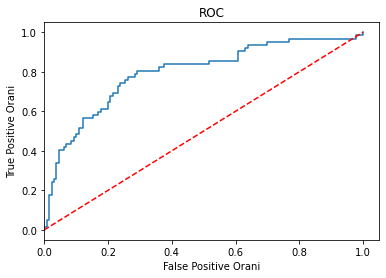

In [75]:
from sklearn.metrics import roc_auc_score,roc_curve

import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test,log_model.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel("False Positive Orani")
plt.ylabel("True Positive Orani")
plt.title("ROC")
plt.show()

Bu asamada modelimizi CV yardimiyla bir validasyon islemine tabii tutacagiz.
* **sklearn.model_selection** altindaki **cross_val_score** fonksiyonunu dahil ederek modelimizin validasyon degerini hesaplayabiliriz.
* Bu fonksiyonun;
    * 1.parametre olarak logistic reg modelimizi vermemiz gerekir
    * 2.parametre olarak bu modelin icerisine yerlestirilmek istenen bagimsiz degiskenler verilir
    * 3.parametre olarak bagimsiz degiskenlerin tahmin degerlerini ne ile karsilastirmak istiyorsak o degisken verilir.
    * 4.parametre olarak da cv degeri verilir.
* Kac katli cv degeri istemissek o kadar validasyondan gecmis deger gelir. mean fonksiyonuyla bunlarin ortalamasini alirsak gereken degeri elde etmis oluruz.

In [77]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_model,X_test,y_test,cv=10).mean()

0.750263157894737

## **b. Naïve Bayes**

Olasilik temelli bir modelleme teknigidir. Amac belirli bir ornegin her bir sinifa ait olma olasiliginin kosullu olasilik temelli hesaplanmasidir.
* Olasilik hesabina dayanan bir siniflandirma algoritmasidir.
* Cok kategorili sinif yapilarinin oldugu senaryolarda iyi calistigi gozlemlenmistir.
* Ilgilenilen yanit degiskeninin cok sinifli oldugu senaryolarda da iyi calistigi gozlemlenmistir.
* Verisetinde kategorik degisken sayisi, surekli degisken sayisi kadar oldugunda da iyi calistigi gozlemlenmistir.
* <div> 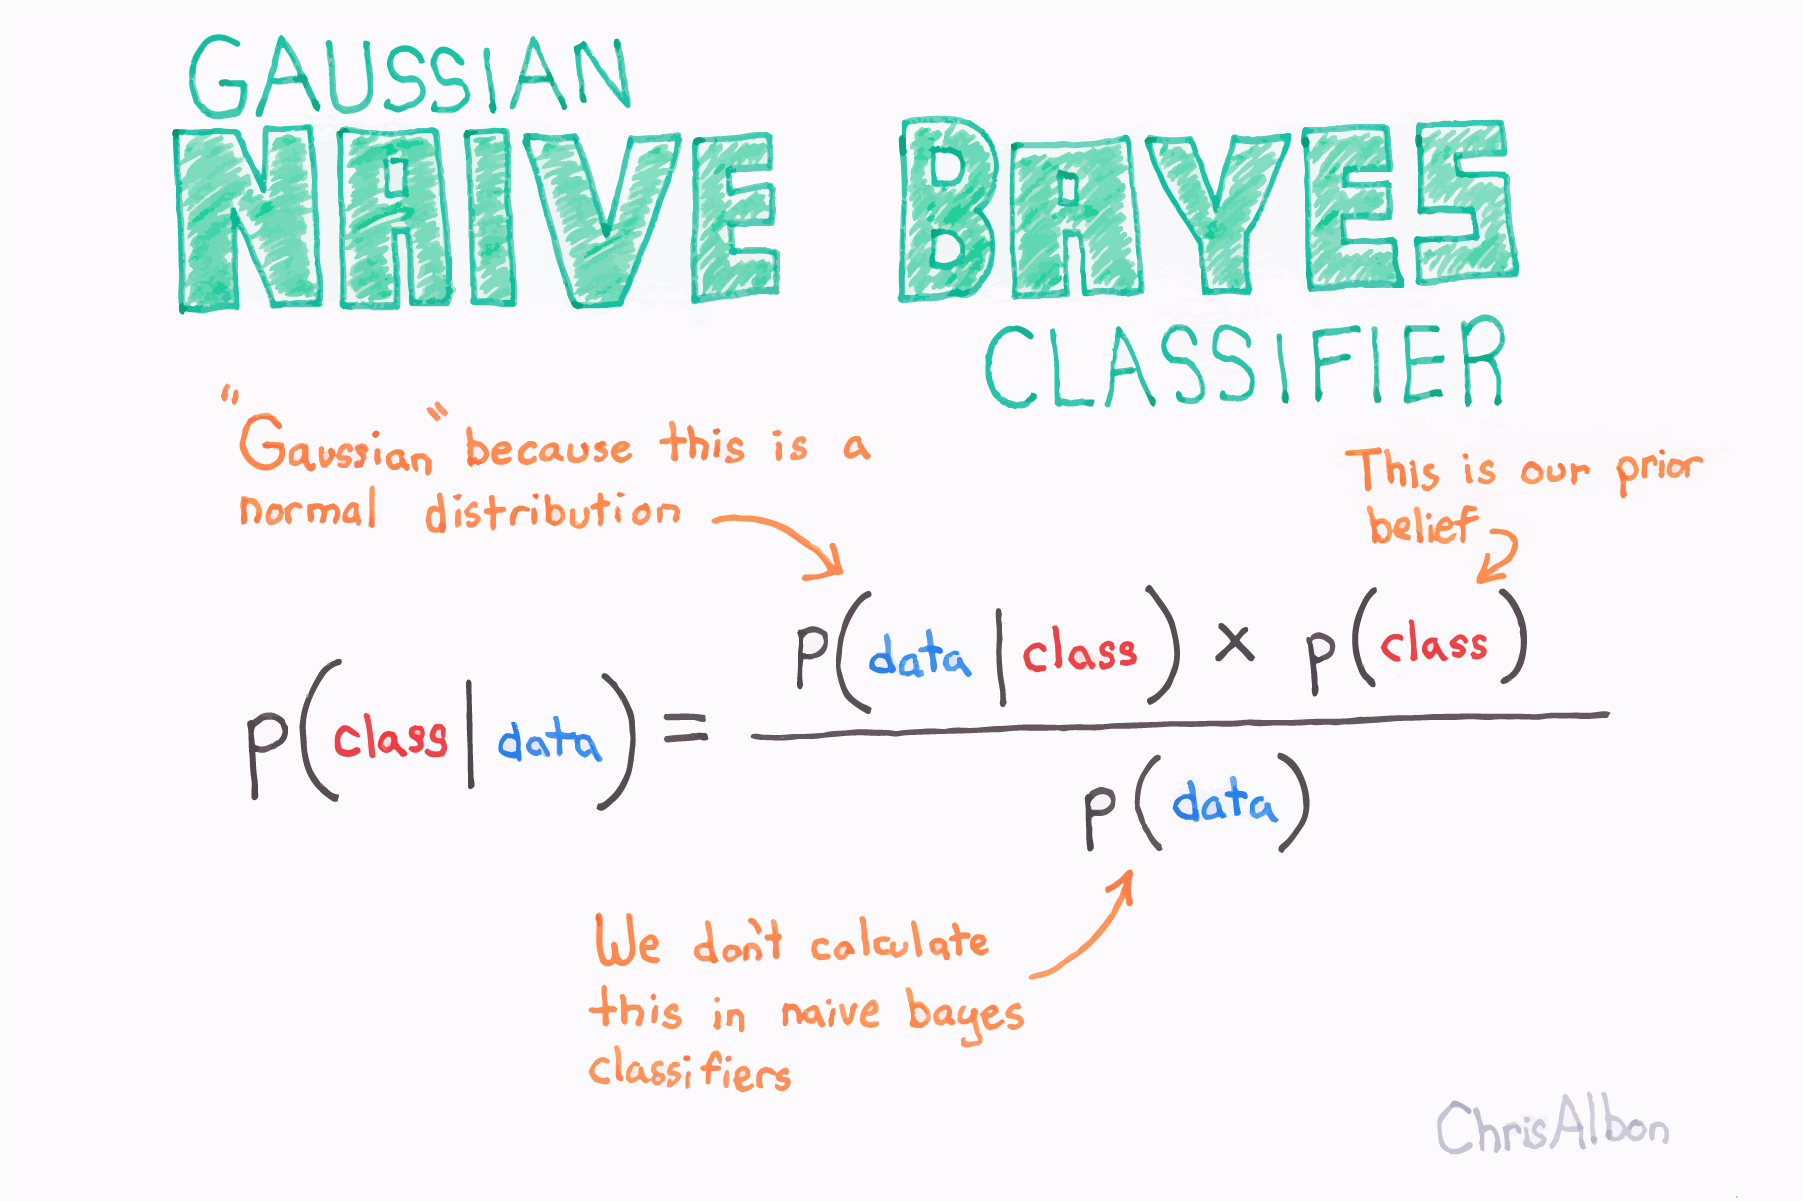</div>

### NB - Model Oluşturma

In [86]:
from sklearn.metrics import mean_squared_error
df = pd.read_csv("csv/diabetes.csv")
df.dropna(inplace = True)
y = np.ravel(df[["Outcome"]])
X = df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 25)

Fonksiyonu kullanmak icin **sklearn.naive_bayes** altindan **GaussianNB** fonksiyonunu projemize dahil etmemiz gerekiyor.
* Naive Bayes algoritmasinda optimize edilmesi gereken dissal bir hiperparametre olmadigi icin herhangi bir tune islemi yapilmayacak.
* Eger bagimli degiskenin siniflari olan 0 ve 1 degerlerinin dagilimlari birbirinden cok farkli ise train ve test olarak ayirdigimiz verisetlerinin icindeki bagimli degiskenin siniflarini inceleyip buna gore test_size'i ayarlamak cok onemlidir.

In [87]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB().fit(X_train,y_train)
nb_model.predict(X_test)[:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [89]:
print("Ilkel Test Hatasi (Accuracy Score):\t", accuracy_score(y_test, nb_model.predict(X_test)))

Ilkel Test Hatasi (Accuracy Score):	 0.7662337662337663


In [91]:
from sklearn.model_selection import cross_val_score

print("Dogrulanmis Test Hatasi (CV):\t",cross_val_score(nb_model,X_test,y_test,cv=10).mean())

Dogrulanmis Test Hatasi (CV):	 0.7835144927536232


## **c. K-En Yakın Komşu (KNN)**

Tahminler gozlem benzerligine gore yapilir. Regresyon bolumunde detaylari verilmistir.

### KNN - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.neighbors** altindan **KNeighborsClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train,y_train)

In [96]:
print("Ilkel Test Hatasi (Accuracy Score):\t", accuracy_score(y_test,knn_model.predict(X_test)))

Ilkel Test Hatasi (Accuracy Score):	 0.7056277056277056


In [97]:
print("Dogrulanmis Test Hatasi (CV):\t",cross_val_score(knn_model,X_test,y_test,cv=10).mean())

Dogrulanmis Test Hatasi (CV):	 0.740036231884058


#### KNN - Model Tuning(C)

KNN modelinde optimize edilmesi gereken dissal hiperparametremiz *k* komsu sayimizdi. Bunun optimal degerini GridSearchCV yardimiyla bulacagiz.

In [99]:
from sklearn.model_selection import GridSearchCV

knn_params = {"n_neighbors" : np.arange(1,100)}

knn_cv = GridSearchCV(knn_model,knn_params,cv=10).fit(X_train,y_train)
knn_cv.best_params_

{'n_neighbors': 16}

In [100]:
accuracy_score(y_test, knn_cv.predict(X_test))

0.70995670995671

## **d. Support Vector Classifier (SVC)**

Amac, iki sinif arasindaki ayrimin optimum olmasini saglayacak hiper-duzlemi bulmaktir.
* Asagidaki gorselde iki boyutlu bir veride ayristirma islemi goruldugu sekilde gerceklestirilebilir.
    * <div> 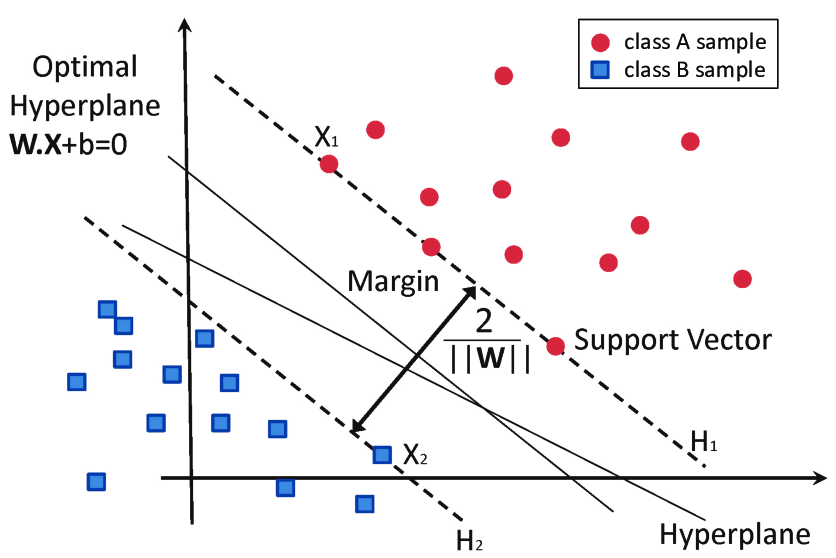</div>
* Gercek hayatta karsimiza cikan verisetlerinde birden fazla boyut soz konusu olabiliyor. Bu sebeple yukaridaki gibi dogrusal bir ayrim her zaman gerceklestirilememektedir. Bu durumda **non-linear svm** dedigimiz durum ortaya cikmaktadir. Bu durumda **Kernel Trick** adi verilen yontem ile ayristirmalar saglanabilmektedir. Solda gorulen sekilde dogrusal bir sekilde ayristirilamadigindan bu durumda *boyut arttirma* islemi yapilarak, 2 boyuttan 3 boyuta gecerek, sagdaki grafigi elde ediyoruz. Boylece siniflari birbirinden ayirt edebiliyoruz.
    * <div> 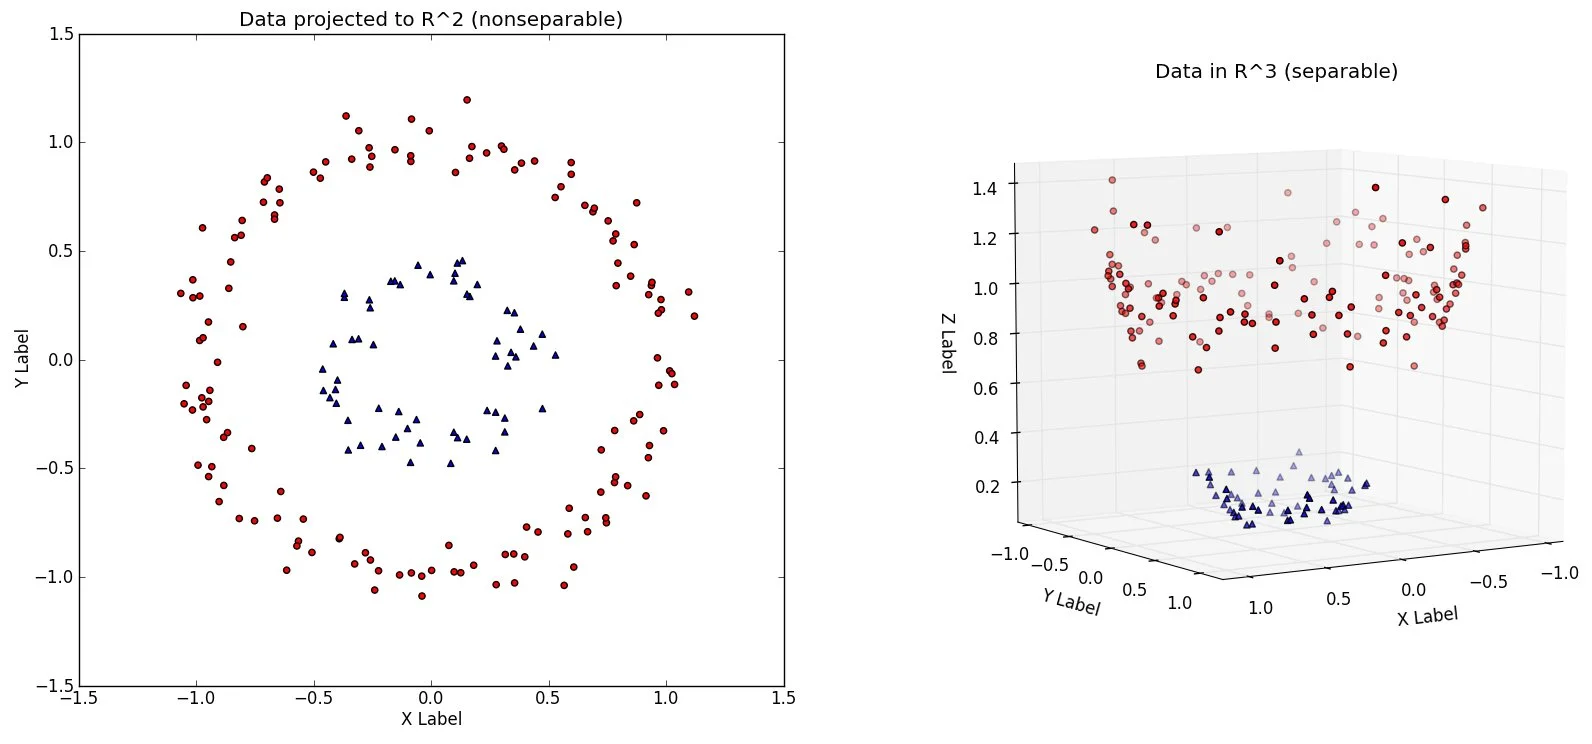</div>

### i. Linear SVC - Model Oluşturma

Fonksiyonu kullanmak icin **sklearn.svm** altindan **SVC** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [101]:
from sklearn.svm import SVC

svc_model = SVC(kernel="linear").fit(X_train,y_train)
svc_model.score(X_test,y_test)

0.7922077922077922

#### Linear SVC - Model Oluşturma Tuning

Burada *linear* olan SVC modelinin hiperparametresi olan **C** degerini tune edecegiz. C degeri, aykiri gozlemlerin goreceli olarak etkilerini kontrol altinda tutup olusacak olan duzlemin kontrol etme imkanini saglar.

In [103]:
svc_params = {"C": np.arange(1,10)}
svc_cv_model = GridSearchCV(svc_model,svc_params,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.3min finished


In [104]:
svc_cv_model.score(X_test,y_test)

0.7922077922077922

### ii. (RBF) Radial Basis Function SVC - Model Oluşturma

Burada dogrusal olmayan SVC modelini kullanacagiz. SVC modelinin default kernel degeri *rbf*'tir.

In [106]:
svc_model = SVC().fit(X_train,y_train)
svc_model.score(X_test,y_test)

0.7662337662337663

#### RBF SVC - Model Tuning

* C degeri, aykiri gozlemlerin goreceli olarak etkilerini kontrol altinda tutup olusacak olan duzlemin kontrol etme imkanini saglar.
* Ayrica kernela verilmesi gereken bir parametre olan **gamma** parametresinin de optimize edilmesi gerekir. Optimize edilmeden de model kurulabilir fakat yeni modelde test hatasi hicbir islem yapmamiscasina ayni cikacaktir.

In [107]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
             "gamma" : [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

svc_cv_model = GridSearchCV(svc_model,svc_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    5.2s finished


In [108]:
svc_cv_model.best_params_

{'C': 5, 'gamma': 0.0001}

In [109]:
svc_cv_model.score(X_test,y_test)

0.7619047619047619

## **e. Yapay Sinir Ağları (ANN)**

Konunun kısa özeti *Doğrusal Olmayan Regresyon Modelleri* başlığı altında incelenmişti.

### ANN - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.neural_network** altindan **MLPClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [111]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier().fit(X_train_scaled,y_train)

C:\Users\ea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [112]:
mlpc.score(X_test_scaled,y_test)

0.7748917748917749

#### ANN - Model Tuning(C)

Algoritmalar karmasiklastikca onlarin karakteristigi ile alakali bilgi sahibi olmamiz zorunlu hale gelir. Mesela biraz once herhangi bir parametre atamasi yapmadan modelimizi olusturduk. Mesela fonksiyonumuzun solver parametresine tanmis on tanimli degeri *adam* degeri fakat bu yontem buyuk verisetleri uzerinde calisirken verimli olmaktadir. Bunun gibi durumlar ile karsilasmamak icin algoritmalarin topolojisini bilmek gerekir.

* **hidden_layer_sizes :** tuple seklinde verilir. verilirken hem gizli katman sayisi hem de katman icerisindeki noron sayisi da belirtilmis olur.
* **activation :** aktivasyon fonksiyonu da optimize edilmesi gereken bir parametredir. classification icin relu ontanimli degeri uygundur.
* **solver :** w agirliklarinin bulunma yontemini belirleyen parametredir. 
* **learning_rate :** bazi agaca dayali yontemlerde numerik degerler verilse de burada ise yontem olarak verilmektedir. agirlik guncellemesi icin verilen yontem parametresidir. 
* **alpha :** L2 penalty parameter. Duzenlilestirme terimidir. Ridge ve Lassodaki cezalandirma terimi ile ayni islevdedir.

In [113]:
mlpc_params = {"alpha": [0.00001, 0.0001, 0.1, 0.01, 0.005, 0.02],
             "hidden_layer_sizes" : [
                 (10,10,10),
                 (100,100,100),
                 (100,100),
                 (3,5),
                 (5,3)
             ],
              "solver" : ["lbfgs","adam","sgd"],
              "activation" : ["relu","logistic"]}

mlpc_cv_model = GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.4min finished
C:\Users\ea\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [115]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (100, 100),
 'solver': 'sgd'}

In [116]:
mlpc_cv_model.score(X_test_scaled,y_test)

0.7878787878787878

## **f. Classification And Regression Trees (CART)**

### CART - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.tree** altindan **DecisionTreeClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [118]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier().fit(X_train,y_train)
accuracy_score(y_test,cart.predict(X_test))

0.7402597402597403

#### CART - Model Tuning(C)

In [119]:
cart_params = {"max_depth" : range(1,10),
              "min_samples_split" : range(2,50)}

cart_cv = GridSearchCV(cart,cart_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    6.9s finished


In [120]:
cart_cv.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [121]:
cart_cv.score(X_test,y_test)

0.7402597402597403

## **g. Random Forest**

### RF - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.ensemble** altindan **RandomForestClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [122]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train,y_train)

In [123]:
rf_model.score(X_test,y_test)

0.7878787878787878

#### RF - Model Tuning(C)

Random Forestin optimize edilecek en onemli 2 degeri bulunmakta, bunlar;
* *n_estimators* : Kullanilacak olan agac sayisi 
* *max_features* : Bolunmelerde goz onunde bulundurulacak olan degisken sayidir.

In [124]:
rf_params = {
    "max_depth" : [2,5,8,10],
    "max_features" : [2,5,8],
    "n_estimators" : [10,500,1000],
    "min_samples_split" : [2,5,10]
}

rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.2min finished


In [127]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 500}

In [128]:
rf_model = RandomForestClassifier(max_depth=10,max_features=5,min_samples_split=10,n_estimators=500).fit(X_train,y_train)
Importance = pd.DataFrame({"Importance" : rf_model.feature_importances_*100}, index=X_train.columns)

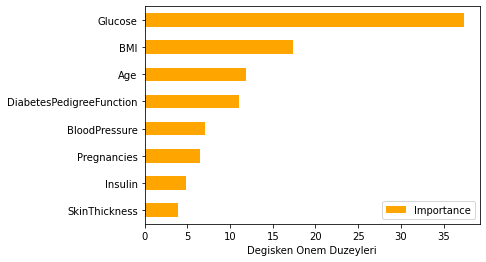

In [129]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="orange")
plt.xlabel("Degisken Onem Duzeyleri");

## **h. Gradient Boosting Machines (GBM)**

### GBM - Model Oluşturma(C)

Fonksiyonu kullanmak icin **sklearn.ensemble** altindan **GradientBoostingClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier().fit(X_train,y_train)
gbm_model.score(X_test,y_test)

0.7402597402597403

#### GBM - Model Tuning(C)

In [132]:
gbm_params = {
    "max_depth" : [3,5,10],
    "learning_rate" : [0.001,0.01,0.1,0.05],
    "n_estimators" : [100,500,1000],
    "min_samples_split" : [2,5,10]
}

gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.5min finished


In [133]:
gbm_cv_model.score(X_test,y_test)

0.7748917748917749

## **i. XGBoost**

### XGBoost - Model Oluşturma(C)

Fonksiyonu kullanmak icin **xgboost** altindan **XGBClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [134]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train,y_train)
xgb_model.score(X_test,y_test)

[02:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ea\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7835497835497836

#### XGBoost - Model Tuning(C)

In [137]:
xgb_params = {
    "max_depth" : [3,4,5],
    "learning_rate" : [0.1,0.01],
    "n_estimators" : [500,1000,2000],
    "min_samples_split" : [2,5,10],
    "subsample" : [0.6,0.8]
}

xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.1min finished
C:\Users\ea\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [138]:
xgb_cv_model.score(X_test,y_test)

0.8008658008658008

## **j. LighGBM**

### LightGBM - Model Oluşturma(C)

Fonksiyonu kullanmak icin **lightgbm** altindan **LGBMClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [140]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier().fit(X_train,y_train)
lgbm_model.score(X_test,y_test)

0.7532467532467533

#### LightGBM - Model Tuning(C)

In [141]:
lgbm_params = {
    "max_depth" : [3,4,5],
    "learning_rate" : [0.1,0.01],
    "n_estimators" : [500,1000,2000],
    "min_child_samples" : [2,5,10],
    "subsample" : [0.6,0.8]
}

lgbm_cv_model = GridSearchCV(lgbm_model,lgbm_params,cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1001 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.2min finished


In [142]:
lgbm_cv_model.score(X_test,y_test)

0.7878787878787878

## **k. CatBoost**

### CatBoost - Model Oluşturma(C)

Fonksiyonu kullanmak icin **catboost** altindan **CatBoostClassifier** fonksiyonunu projemize dahil etmemiz gerekiyor.

In [150]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(silent=True).fit(X_train,y_train)

In [151]:
cat_model.score(X_test,y_test)

0.8051948051948052

#### CatBoost - Model Tuning(C)

CatBoost'un belirli parametrelerle cv islemi cok uzun surdugu icin ontanimli degerlerle cv islemi gerceklestirildi.

In [153]:
cross_val_score(cat_model,X_test,y_test,cv=10).mean()

0.7708333333333333